# Modeling residuals on university rankings

We'll try to apply the principles we saw in the diamonds-example to [this](https://www.kaggle.com/datasets/alitaqi000/world-university-rankings-2023) dataset. And to make it a competition or anything, but let's see who has the most influence on the ranking of a university: the rate of international students or the teaching score!

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("files/World University Rankings 2023.csv", index_col=0)
df.head()

,Name of University,Location,No of student,No of student per staff,International Student,Female:Male Ratio,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score
University Rank,,,,,,,,,,,,
1,University of Oxford,United Kingdom,"20,965",10.6,42%,48 : 52,96.4,92.3,99.7,99.0,74.9,96.2
2,Harvard University,United States,"21,887",9.6,25%,50 : 50,95.2,94.8,99.0,99.3,49.5,80.5
3,University of Cambridge,United Kingdom,"20,185",11.3,39%,47 : 53,94.8,90.9,99.5,97.0,54.2,95.8
3,Stanford University,United States,"16,164",7.1,24%,46 : 54,94.8,94.2,96.7,99.8,65.0,79.8
5,Massachusetts Institute of Technology,United States,"11,415",8.2,33%,40 : 60,94.2,90.7,93.6,99.8,90.9,89.3


For the purpose of this exercise, we'll only be looking at countries with a lot of universities in them. Sort by descending amount of universities and keep only those rows from the top 10 countries. (Hint, the 11th country, Pakistan, has 55 universities.)

In [129]:
# Up to you!



Location
United States     173
Japan             150
United Kingdom    149
India              91
China              82
Turkey             75
Brazil             73
Iran               63
Spain              57
Nigeria            56
Name: count, dtype: int64

Now do a boxplot for "Teaching score", our goal metric, split by country.

In [130]:
sns.boxplot(data=sub_df, x='Location', y='OverAll Score')

c:\Scripts\course material\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Scripts\course material\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


TypeError: Neither the `x` nor `y` variable appears to be numeric.

Doesn't work, does it? A number of our metrics are numbers that are stored as objects. Compare which ones by looking at the data and the datatypes.

In [131]:
# Up to you!



                                    Name of University        Location  \
University Rank                                                          
1                                 University of Oxford  United Kingdom   
2                                   Harvard University   United States   
3                              University of Cambridge  United Kingdom   
3                                  Stanford University   United States   
5                Massachusetts Institute of Technology   United States   

                No of student  No of student per staff International Student  \
University Rank                                                                
1                      20,965                     10.6                   42%   
2                      21,887                      9.6                   25%   
3                      20,185                     11.3                   39%   
3                      16,164                      7.1                   24%   
5

An overview:
- Name of University             , object: Ok!
- Location                       , object: Ok!
- No of student                  , object: Wrong
- No of student per staff       , float64: Ok!
- International Student          , object: Wrong
- Female:Male Ratio              , object: Wrong
- OverAll Score                  , object: Wrong
- Teaching Score                , float64: Ok!
- Research Score                , float64: Ok!
- Citations Score               , float64: Ok!
- Industry Income Score         , float64: Ok!
- International Outlook Score   , float64: Ok!

Fix the wrong ones. Do you also feel the [lambda](https://www.geeksforgeeks.org/applying-lambda-functions-to-pandas-dataframe/)-vibe in this one?

(Challenges: nan-values, OverAll score sometimes contains "10.5-18.3" or something like that and the "-" isn't a normal "-", ratio has to be split and divided female/male, but there is an all female-college.)

In [132]:
# Up to you!



But we were doing a boxplot!

c:\Scripts\course material\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Scripts\course material\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Scripts\course material\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Location', ylabel='OverAll Score'>

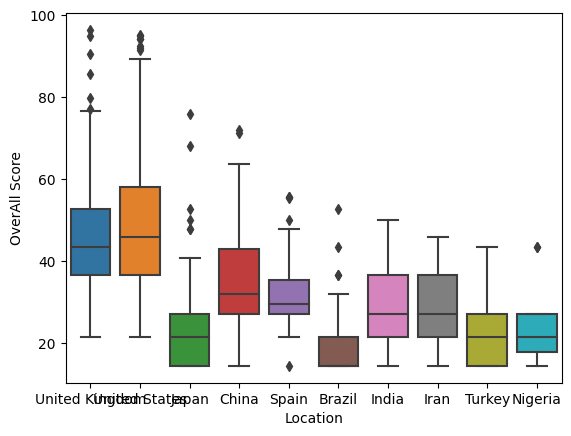

In [133]:
sns.boxplot(data=sub_df, x='Location', y='OverAll Score')

There seems to be some influence. What other metrics are important? Try a correlation matrix.

<Axes: >

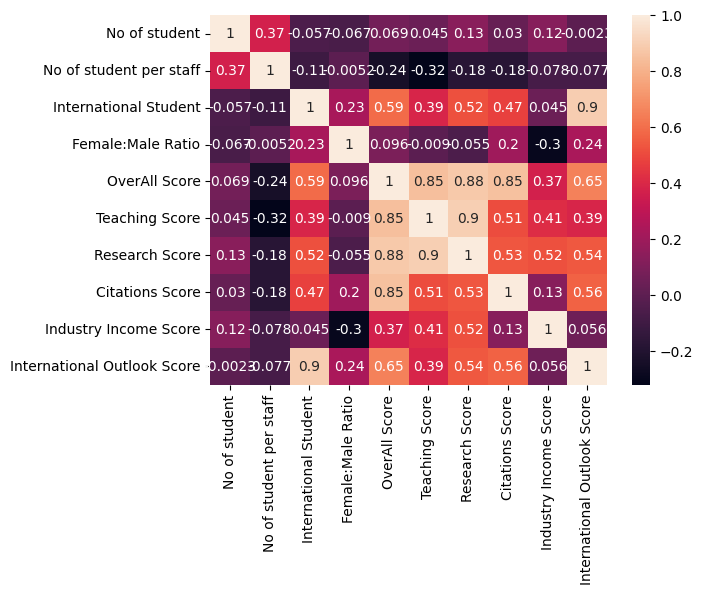

In [135]:
# plot a correlation matrix of sub_df
corr = sub_df.corr(numeric_only=True)
sns.heatmap(corr, annot=True)

We are trying to maximize the OverAll Score, so if we look at that line and do some creative copy-pasting in paint, we get the following image.

![](files/2023-09-14-15-24-10.png)


Now analyze this data. What is the influence of the different columns?

(The following is a code-block, but we expect only text, the sort of which you'll also be expected to be able to produce on the exam.)

In [ ]:
# Up to you!



Also, copy-pasting in paint? Really? Show all values from the correlation matrix for OverAll Score order from high to low.

In [167]:
# Up to you!



OverAll Score                  1.000000
Research Score                 0.881280
Citations Score                0.851161
Teaching Score                 0.845422
International Outlook Score    0.653108
International Student          0.590343
Industry Income Score          0.365302
Female:Male Ratio              0.096154
No of student                  0.069007
No of student per staff       -0.241466
Name: OverAll Score, dtype: float64

Let's look at the teaching score vs the overall score in a scatter plot. Add the percentage of international students as a color.

c:\Scripts\course material\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Scripts\course material\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Scripts\course material\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='OverAll Score', ylabel='Teaching Score'>

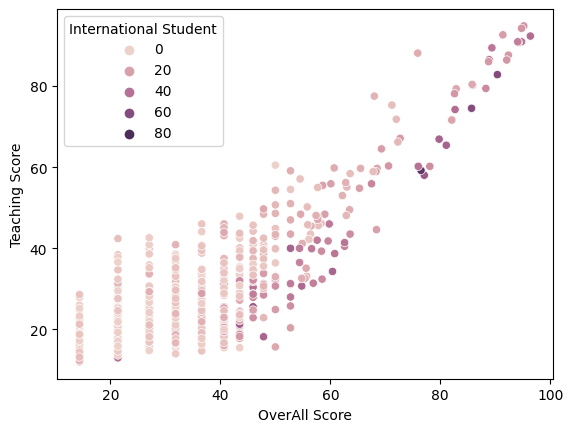

In [146]:
# Up to you!



The dark dots (high number of international students) occur more on the right side of the plot, but some also appear on the left. We know there is a positive effect, but how big is it? To understand that we have to remove the influence of the Teaching score.

We'll assume the influence of teaching score on overall score is linear. No need to do a log this time.

Also, to make the linear regression model work we'll need to delete all na-values. Wish we would have done that before converting al the datatypes, it would have made our lives a lot easier.

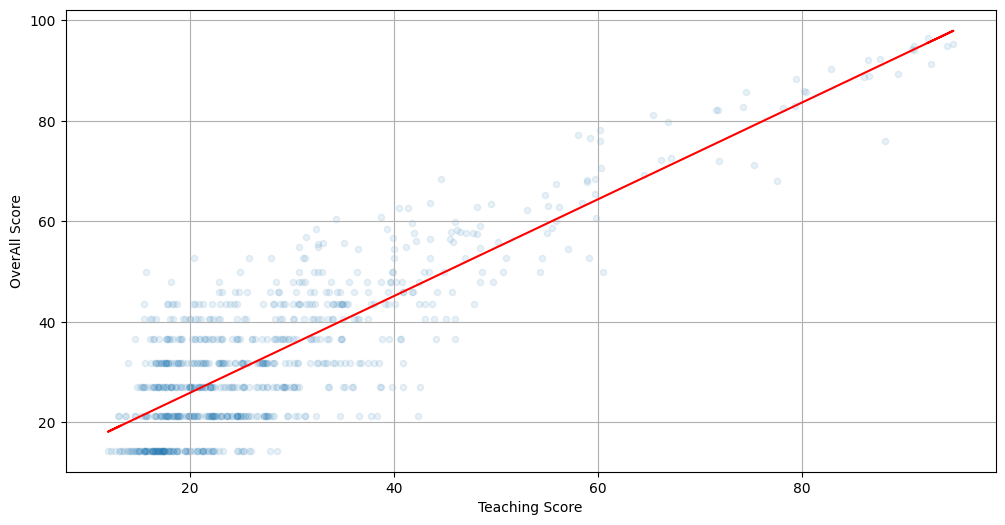

In [150]:
# print(sub_df.count())
sub_df.dropna(inplace=True)
# print(sub_df.count())

from sklearn import datasets, linear_model

x = sub_df["Teaching Score"].values.reshape(-1, 1)
y = sub_df["OverAll Score"].values.reshape(-1, 1)

regr = linear_model.LinearRegression()
model = regr.fit(x, y)

fig, ax = plt.subplots(figsize=(12,6))

sub_df.plot(kind='scatter', x="Teaching Score", y="OverAll Score", grid=True,fontsize=10, ax=ax,  figsize=(12, 6), alpha=0.1)
plt.plot(x, regr.predict(x), color='red')

Maybe print the parameters for the regression-line?

In [151]:
print(f"a= {model.coef_[0][0]}, b= {model.intercept_[0]}")

a= 0.9637485249558633, b= 6.565581186521733


And there is our linear model. Now we use this to predict the values for every weight. Once we have this predicted weight, we use it to calculate the residuals (or the error) for every actual value.

<Axes: xlabel='Teaching Score', ylabel='overall_score_residuals'>

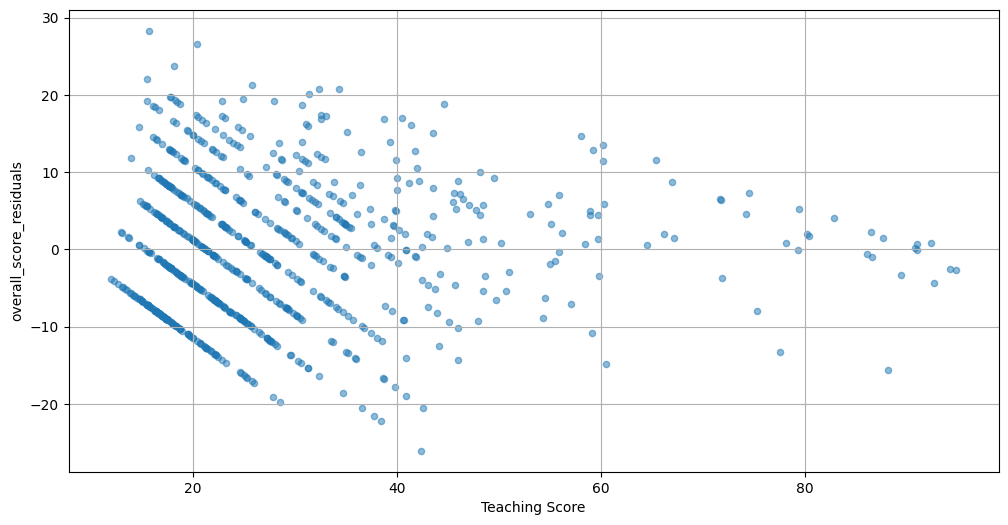

In [155]:
sub_df['overall_score_predicted'] = model.predict(sub_df["Teaching Score"].values.reshape(-1, 1))
sub_df['overall_score_residuals'] = sub_df["OverAll Score"] - sub_df['overall_score_predicted']

# df.head()
sub_df.plot(kind='scatter', x="Teaching Score", y="overall_score_residuals", grid=True,fontsize=10, figsize=(12, 6), alpha=0.5)

What we have here is a plot of teaching score vs the residuals of the overall score. These residuals imply that the teaching score has no predictive value anymore and that is actually the case: the data is almost random.

Well, not quite. There are still some lines left because the research score and the citations score are still in there. But if we plot the residuals of the the overall score vs the international students, what do we get?

<Axes: xlabel='overall_score_residuals', ylabel='International Student'>

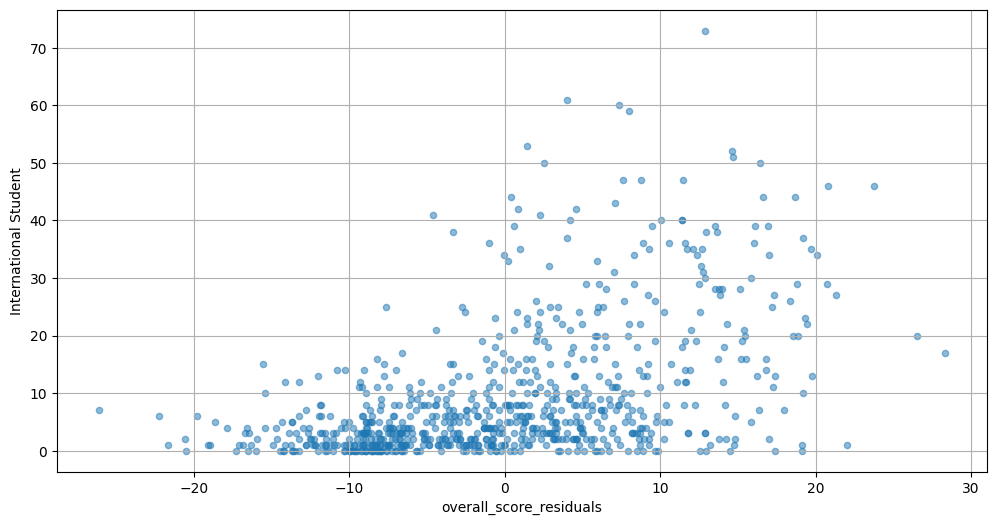

In [161]:
sub_df.plot(kind='scatter', y="International Student", x="overall_score_residuals", grid=True,fontsize=10, figsize=(12, 6), alpha=0.5)

We see that:
- Most schools have a low percentage of international students (< 20). They have both positive and negative residuals, so both bad and good scores.
- Above 20% international students we don't see many below 0 residuals anymore. This means that there is indeed a trend that more international students mean better schools.

But was all this necessary? Couldn't we have just made the same plot with the original data?

<Axes: xlabel='OverAll Score', ylabel='International Student'>

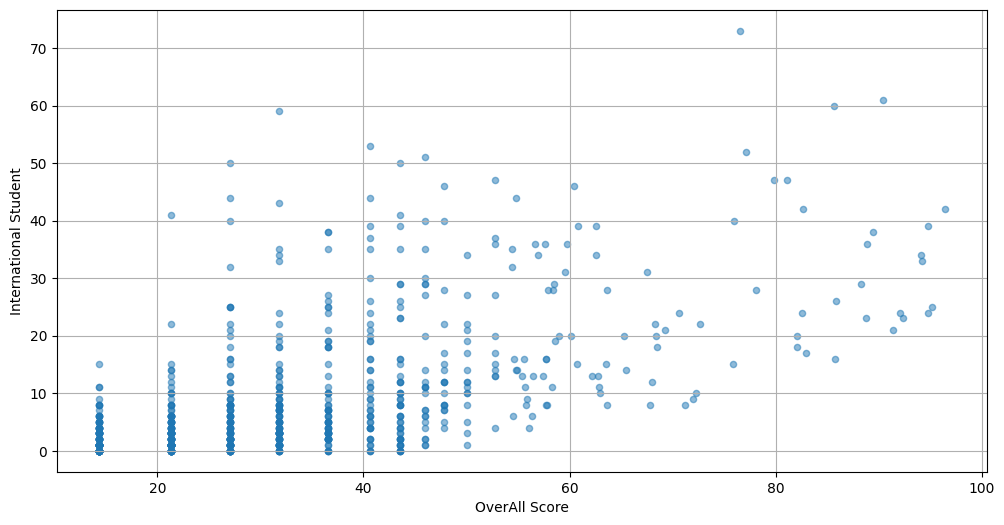

In [160]:
# Up to you!



The trend is indeed there, but less explicit than after applying the model. This should become even clearer when you remove the research and the citations score from the residuals.